<a href="https://colab.research.google.com/github/mlcow/prob-stats/blob/master/Univariate_parametric_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special
import math

In [0]:
def gen_label(label, **args):
  def clean_string(x):
    if x.startswith('_'):
      return x[1:]
    else:
      return x
  if label:
    label += " - "
  return label + ", ".join(("{}:{}".format(clean_string(it[0]), it[1]) for it in args.items()))


def plot_distribution(s, e, p_f, label='', fmt='-', alpha=1, **args):
  x = np.arange(s, e)
  y = [p_f(i, **args) for i in x]
  label = gen_label(label, **args)
  plt.plot(x, y, fmt, label=label, alpha=alpha)

In [3]:
gen_label('', _lambda=10)

'lambda:10'

# Binomial


Plot variations of a bernoulli as $p$ varies

In [0]:
def binomial_f(x,n,p):
    return scipy.special.binom(n, x) * 1.0 * (p ** x) * ((1 - p) ** (n - x))

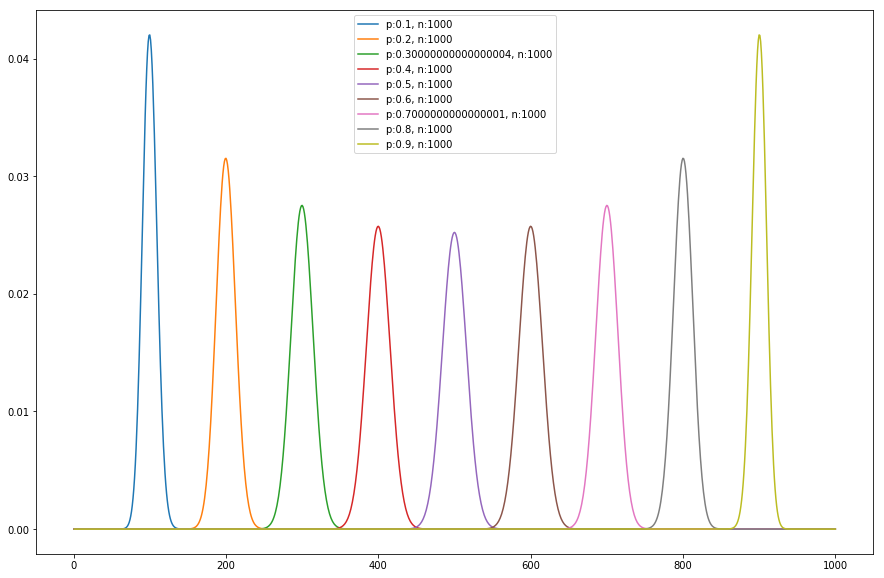

In [5]:
plt.figure(figsize=[15,10])
for i in np.arange(.1, 1, .1):
  plot_distribution(1, 1001, binomial_f, p=i, n=1000, label='')
plt.legend()

# Hypergeometric Distribution

$$f_x(x;M,K,n) = \frac{\binom{K}{x}\binom{M-K}{n-x}}{\binom{M}{n}}I_{\{0,1,...,n\}}(x)$$

Probably of selecting $x$ of a kind when selecting (without replacement) $n$  from a set of $M$ items containing of two kinds $K$ and $M-K$.

In [0]:
def binom(a, b):
  return scipy.special.binom(a, b)

def hypergeometric_f(x,m,k,n):
  return 1.0 * binom(k, x) * binom(m-k, n-x) / binom(m, n)

Text(0.5, 1.0, 'Varying n at K = 200, 400, 800')

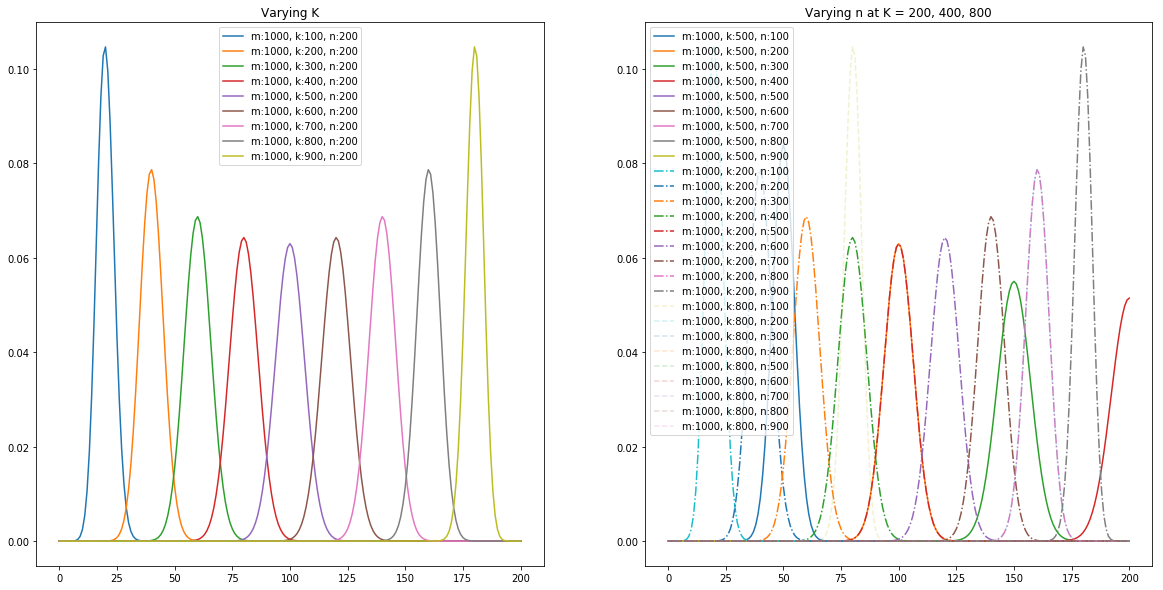

In [7]:
# Varying k
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
for k in range(100, 1000, 100):
  plot_distribution(0, 201, hypergeometric_f, m=1000, k=k, n=200)
  
plt.legend()
plt.title("Varying K")

plt.subplot(1,2,2)

# Varying n
for n in range(100, 1000, 100):
  plot_distribution(0, 201, hypergeometric_f, m=1000, k=500, n=n)
  
# Varying n
for n in range(100, 1000, 100):
  plot_distribution(0, 201, hypergeometric_f, m=1000, k=200, n=n, fmt='-.')
  
# Varying n
for n in range(100, 1000, 100):
  plot_distribution(0, 201, hypergeometric_f, m=1000, k=800, n=n, fmt='--', alpha=0.2)
  
plt.legend()
plt.title("Varying n at K = 200, 400, 800")

# Poisson Distribution

$$f_X(x; \lambda)=\frac{e^{-\lambda}\lambda^x}{x!}$$

$\mu=\lambda$

$\sigma^2=\lambda$

$m_x(t)=e^\lambda(e^t-1)$

In [0]:
def poisson_f(x, _lambda):
  return np.exp(- _lambda) * (float(_lambda)**x) / scipy.special.factorial(x)

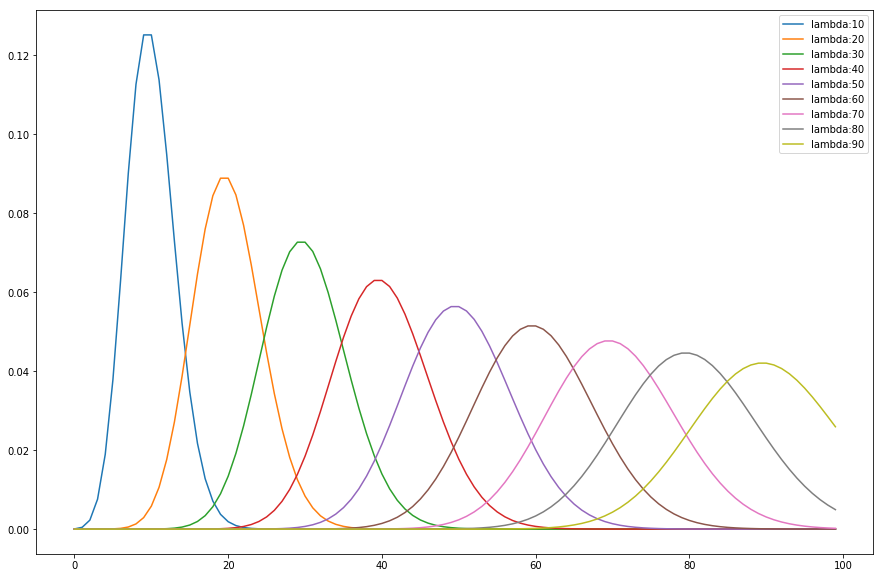

In [9]:
plt.figure(figsize=[15,10])
for i in range(10, 100, 10):
  plot_distribution(0, 100, poisson_f, _lambda=i)
plt.legend()

# Overlapping plots of all distributions

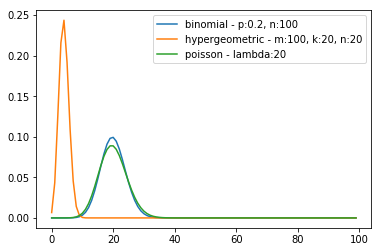

In [10]:
plot_distribution(0, 100, binomial_f, p=.2, n=100, label='binomial')
#plot_distribution(0, 100, hypergeometric_f, m=100, k=20, n=100, label='hypergeometric')
plot_distribution(0, 100, hypergeometric_f, m=100, k=20, n=20, label='hypergeometric')
plot_distribution(0, 100, poisson_f, _lambda=20, label='poisson')
plt.legend()

Observations
- Binomial is close to poisson, and for large n bionomial should become equal to poisson

# Geoemetric distribution
$$f_X(x;p)=p(1-p)^x$$

$\mu = \frac{q}{p}$

$\sigma^2 = \frac{q}{p^2}$

$m_X(t)=\frac{p}{1-qe^t}$

In [0]:
def geometric_f(x, p):
  return p* (( 1 - p)**x)

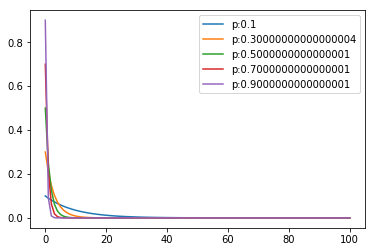

In [12]:
for i in np.arange(.1, 1, .2):
  plot_distribution(0, 101, geometric_f, p=i)
plt.legend()

# Negative bionomial distribution

$$f_X(x;r,p)=\binom{r+x-1}{x}p^rq^x$$


$\mu=$

$\sigma^2=$

$m_X(t)=$

In [0]:
def negative_binom_f(x, r, p):
  q = 1 - p
  return scipy.special.binom(r + x - 1, x) * (p**r) * (q**x)

Text(0.5, 1.0, 'Varying r at K = 40, 80')

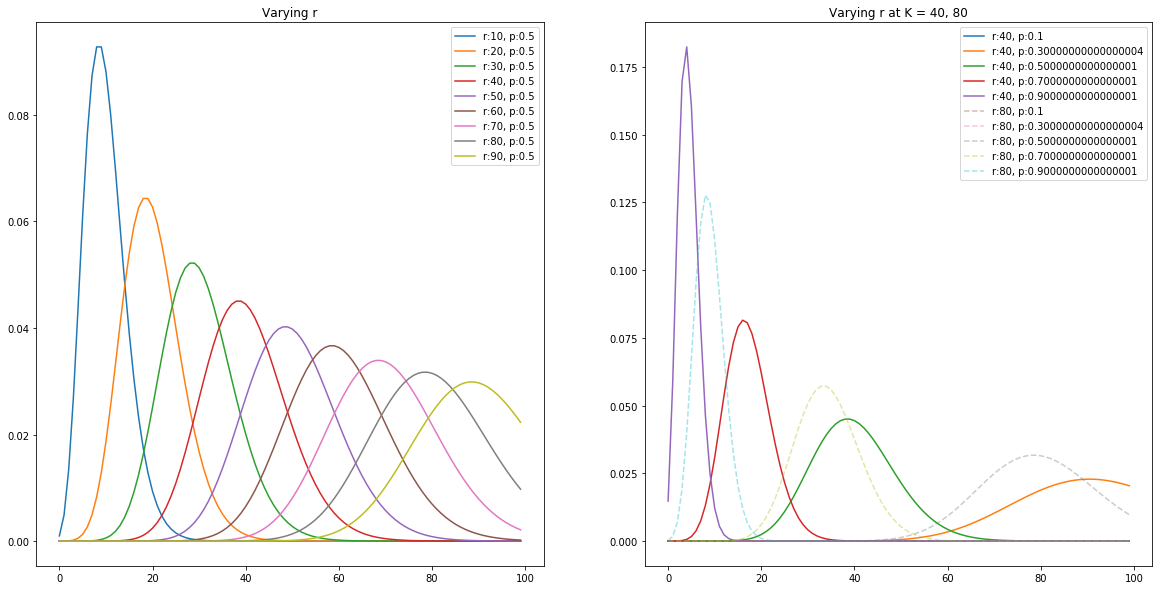

In [14]:
# Varying r
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
for r in np.arange(10, 100, 10):
    plot_distribution(0, 100, negative_binom_f, r=r, p=.5, fmt='-')
  
plt.legend()
plt.title("Varying r")

plt.subplot(1,2,2)

# Varying p
for p in np.arange(.1, 1, .2):
  plot_distribution(0, 100, negative_binom_f, r=40, p=p, fmt='-')  
  
# Varying p
for p in np.arange(.1, 1, .2):
    plot_distribution(0, 100, negative_binom_f, r=80, p=p, fmt='--', alpha=0.4)
  
plt.legend()
plt.title("Varying r at K = 40, 80")

# Logarithmic distribution

$$f_X(x;p)=\frac{q^x}{-x\ln{p}}$$

$\mu=\frac{-q}{\ln{p}}$

$\sigma^2=\frac{q(q+logp)}{-(p\ln{p})^2}$

$m_X(t)=\frac{\ln(1-qe^t)}{\ln{p}}$

In [0]:
def logarithmic_f(x, p):
  q = 1 - p
  return -1.*(q**x)/x/math.log(p)

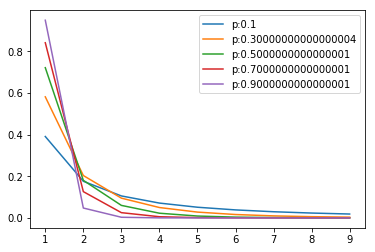

In [16]:
for i in np.arange(.1,1,.2):
  plot_distribution(1, 10, logarithmic_f, p=i)
plt.legend()

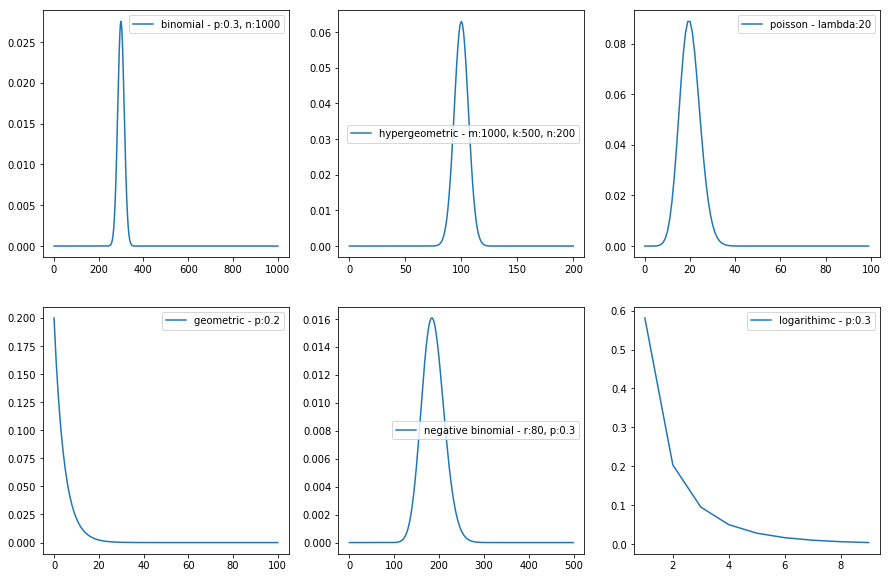

In [17]:
plt.figure(figsize=[15,10])
plt.subplot(2,3,1)
plot_distribution(1, 1001, binomial_f, p=0.3, n=1000, label='binomial')
plt.legend()
plt.subplot(2,3,2)
plot_distribution(0, 201, hypergeometric_f, m=1000, k=500, n=200, label='hypergeometric')
plt.legend()
plt.subplot(2,3,3)
plot_distribution(0, 100, poisson_f, _lambda=20, label='poisson')
plt.legend()
plt.subplot(2,3,4)
plot_distribution(0, 101, geometric_f, p=.2, label='geometric')
plt.legend()
plt.subplot(2,3,5)
plot_distribution(0, 500, negative_binom_f, r=80, p=.3, label='negative binomial')
plt.legend()
plt.subplot(2,3,6)
plot_distribution(1, 10, logarithmic_f, p=.3, label='logarithimc')
plt.legend()